In [17]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [18]:
df = pd.read_csv("NigeriaInflationRates.csv")

In [19]:
df.head()

,Year,Month,Inflation_Rate,Crude Oil Price,Production,Crude Oil Export,CPI_Food,CPI_Energy,CPI_Health,CPI_Transport,CPI_Communication,CPI_Education
0,2008,1,8.6,94.26,2.17,1.72,75.534431,84.612846,83.863139,86.530038,83.129440,75.284466
1,2008,2,8.0,98.15,2.08,1.63,75.154185,85.231632,83.365891,88.355236,82.889814,75.457619
2,2008,3,7.8,103.73,2.06,1.61,78.242523,83.251516,86.082993,84.376304,81.893471,74.826847
3,2008,4,8.2,116.73,1.96,1.51,79.434268,84.348830,89.445332,88.600334,93.937865,73.664248
4,2008,5,9.7,126.57,2.05,1.60,80.783677,85.574027,90.540461,87.932833,97.553285,74.880442


In [20]:
df.shape


(198, 12)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               198 non-null    int64  
 1   Month              198 non-null    int64  
 2   Inflation_Rate     198 non-null    float64
 3   Crude Oil Price    197 non-null    float64
 4   Production         197 non-null    float64
 5   Crude Oil Export   197 non-null    float64
 6   CPI_Food           198 non-null    float64
 7   CPI_Energy         198 non-null    float64
 8   CPI_Health         198 non-null    float64
 9   CPI_Transport      198 non-null    float64
 10  CPI_Communication  198 non-null    float64
 11  CPI_Education      198 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 18.7 KB


In [22]:
df.describe()

,Year,Month,Inflation_Rate,Crude Oil Price,Production,Crude Oil Export,CPI_Food,CPI_Energy,CPI_Health,CPI_Transport,CPI_Communication,CPI_Education
count,198.000000,198.000000,198.000000,197.000000,197.000000,197.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,2015.757576,6.409091,14.068232,79.886599,1.921015,1.471015,276.715714,234.199688,208.020379,228.683823,144.088741,206.733061
std,4.779591,3.459603,5.456106,26.586380,0.412341,0.412341,200.000754,122.478906,107.971671,130.467048,42.279734,108.070293
min,2008.000000,1.000000,7.700000,14.280000,0.940000,0.490000,75.154185,83.251516,83.365891,84.376304,81.893471,73.664248
25%,2012.000000,3.000000,10.625000,58.460000,1.650000,1.200000,129.971845,133.807834,124.538660,130.159867,109.843668,117.544356
50%,2016.000000,6.000000,12.735000,77.540000,2.040000,1.590000,196.133375,206.319517,171.976085,186.001890,131.918626,170.853864
75%,2020.000000,9.000000,16.040000,106.000000,2.210000,1.760000,357.349555,303.127288,258.450157,290.534903,169.037119,268.782500
max,2024.000000,12.000000,34.190000,138.740000,2.880000,2.430000,943.458769,596.496022,524.747711,620.966251,236.061986,498.242239


In [23]:
df.isnull().sum()

Year                 0
Month                0
Inflation_Rate       0
Crude Oil Price      1
Production           1
Crude Oil Export     1
CPI_Food             0
CPI_Energy           0
CPI_Health           0
CPI_Transport        0
CPI_Communication    0
CPI_Education        0
dtype: int64

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
df["date"] = pd.to_datetime(df["Year"].astype(str) + "-" + df["Month"].astype(str))
df = df.sort_values("date")

In [26]:
df.head()

,Year,Month,Inflation_Rate,Crude Oil Price,Production,Crude Oil Export,CPI_Food,CPI_Energy,CPI_Health,CPI_Transport,CPI_Communication,CPI_Education,date
0,2008,1,8.6,94.26,2.17,1.72,75.534431,84.612846,83.863139,86.530038,83.129440,75.284466,2008-01-01
1,2008,2,8.0,98.15,2.08,1.63,75.154185,85.231632,83.365891,88.355236,82.889814,75.457619,2008-02-01
2,2008,3,7.8,103.73,2.06,1.61,78.242523,83.251516,86.082993,84.376304,81.893471,74.826847,2008-03-01
3,2008,4,8.2,116.73,1.96,1.51,79.434268,84.348830,89.445332,88.600334,93.937865,73.664248,2008-04-01
4,2008,5,9.7,126.57,2.05,1.60,80.783677,85.574027,90.540461,87.932833,97.553285,74.880442,2008-05-01


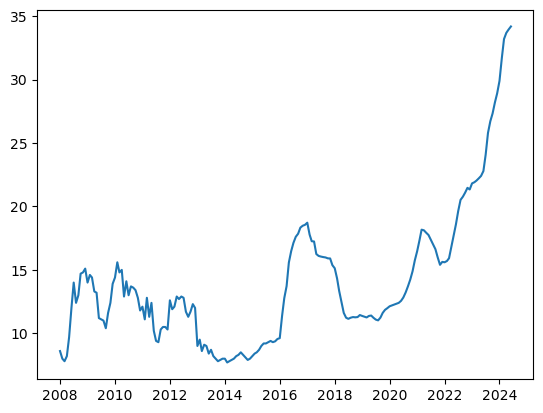

In [28]:
plt.plot(df["date"], df["Inflation_Rate"])

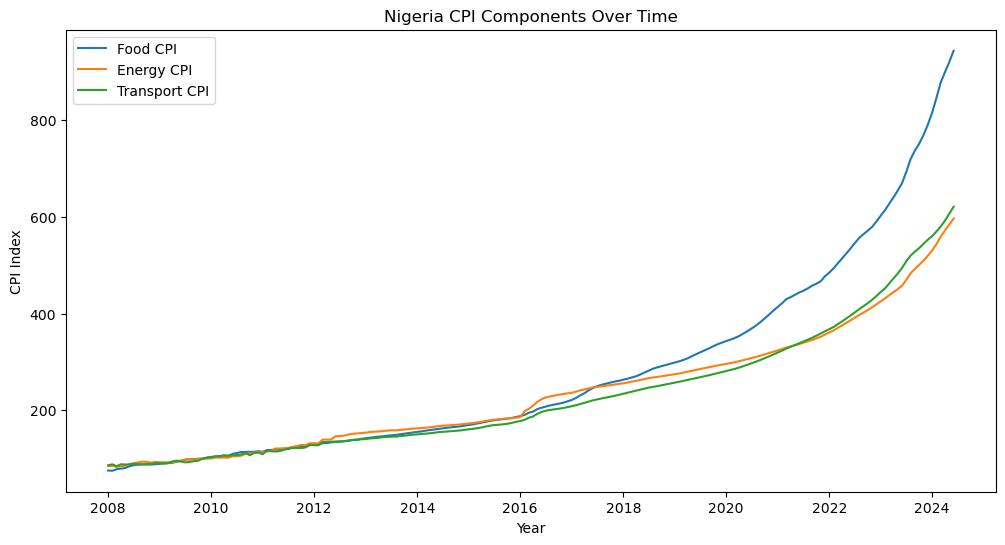

In [29]:
plt.figure(figsize=(12,6))
plt.plot(df["date"], df["CPI_Food"], label="Food CPI")
plt.plot(df["date"], df["CPI_Energy"], label="Energy CPI")
plt.plot(df["date"], df["CPI_Transport"], label="Transport CPI")

plt.title("Nigeria CPI Components Over Time")
plt.xlabel("Year")
plt.ylabel("CPI Index")
plt.legend()
plt.show()

## Inflation_Rate represents the percentage change in the general price level, while CPI variables represent index levels measuring price changes within specific consumption categories.

In [33]:
# Calculate CPI-based Inflation

df["Food_Inflation_Calc"] = df["CPI_Food"].pct_change() * 100
df["Energy_Inflation_Calc"] = df["CPI_Energy"].pct_change() * 100
df["Transport_Inflation_Calc"] = df["CPI_Transport"].pct_change() * 100

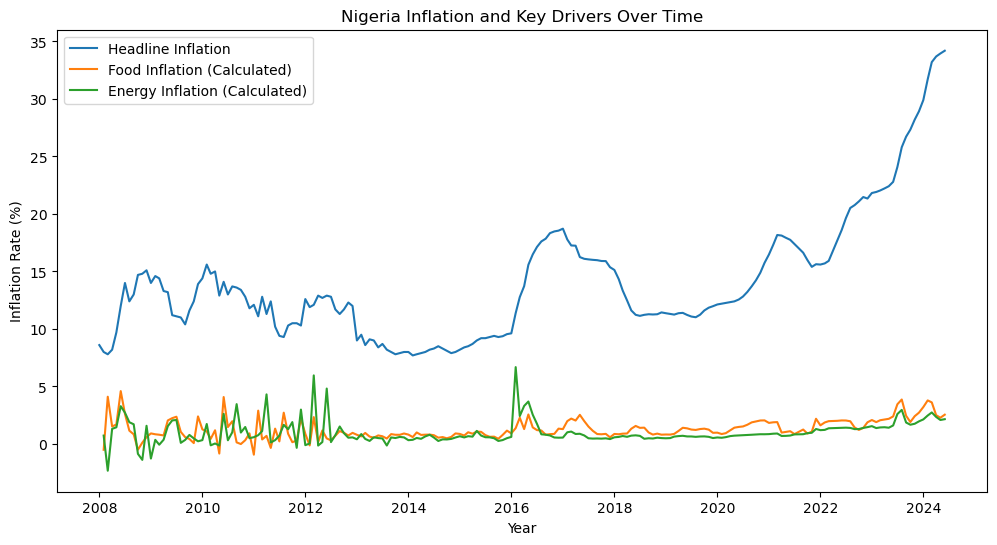

In [35]:
# Plot Inflation Drivers Together

plt.figure(figsize=(12,6))
plt.plot(df["date"], df["Inflation_Rate"], label="Headline Inflation")
plt.plot(df["date"], df["Food_Inflation_Calc"], label="Food Inflation (Calculated)")
plt.plot(df["date"], df["Energy_Inflation_Calc"], label="Energy Inflation (Calculated)")

plt.title("Nigeria Inflation and Key Drivers Over Time")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.legend()
plt.show()